In [5]:
# imports
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [18]:
 def load_img():
     blank_img = np.zeros((600,600))
     font = cv2.FONT_HERSHEY_SIMPLEX
     cv2.putText(blank_img,text = 'ABCDE' , org = (50,300) , fontFace = font , fontScale = 5 , color = (255,255,255),thickness = 25)
     return blank_img

In [19]:
def display_img(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')

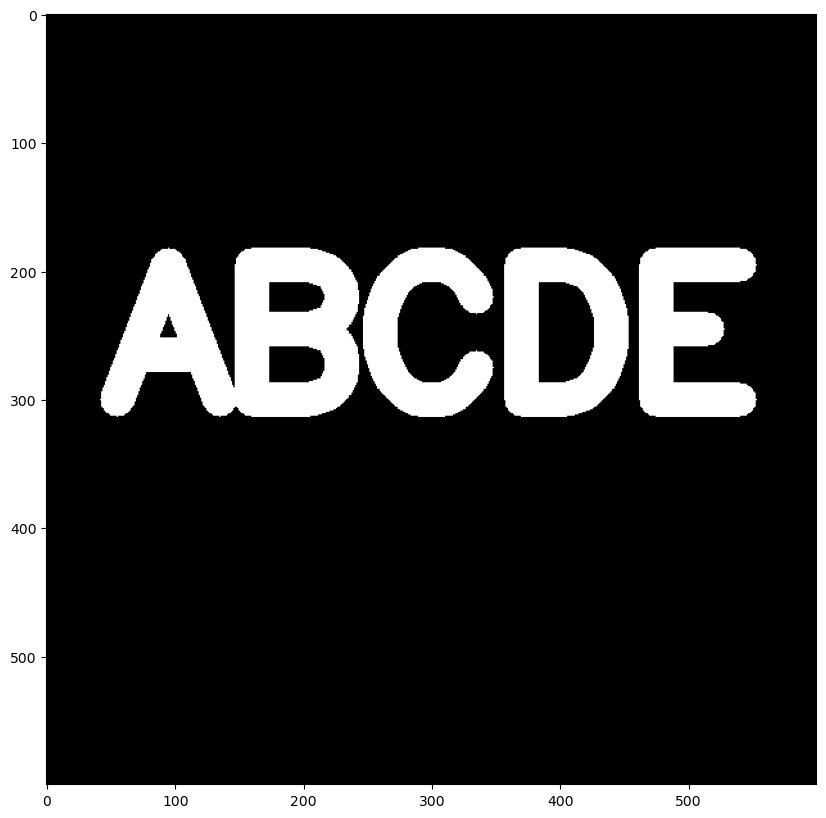

In [33]:
img = load_img()
display_img(img)

In [23]:
# Erosion morphological operator
kernel = np.ones((5,5),dtype = np.uint8)

In [24]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [34]:
result = cv2.erode(img,kernel,iterations= 4)

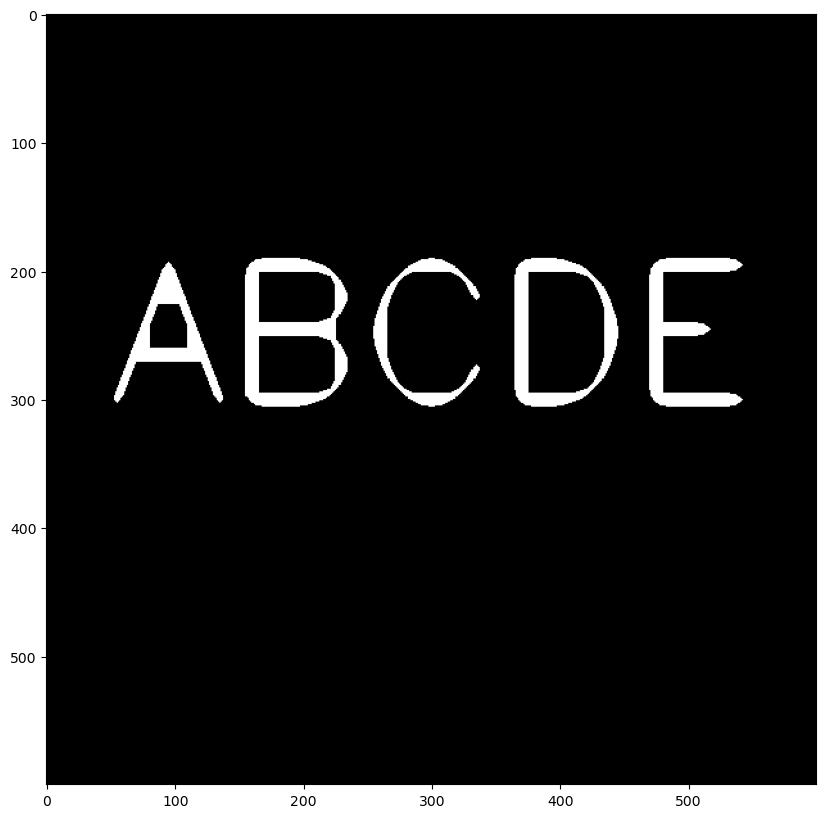

In [35]:
display_img(result)

In [37]:
# reload image again
img = load_img()

In [40]:
# creating white noise
white_noise = np.random.randint(low = 0 , high = 2 , size = (600,600))

In [41]:
white_noise

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 0, 0]])

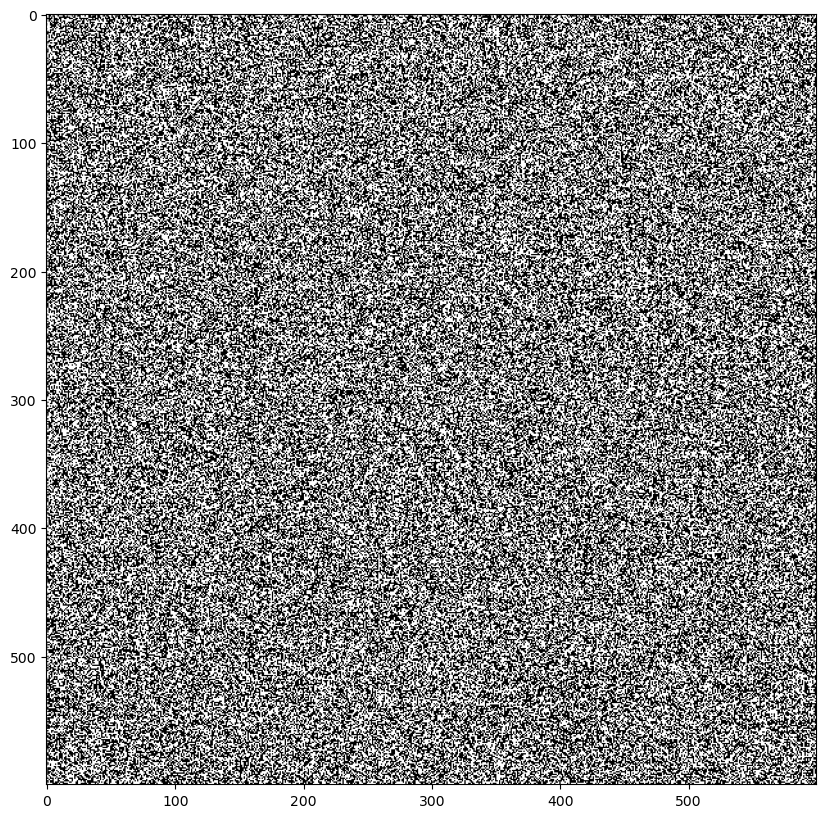

In [42]:
display_img(white_noise)

In [43]:
img.max()

255.0

In [44]:
# converting white_noise from 1 and 0 to 0 and 255
white_noise = white_noise * 255

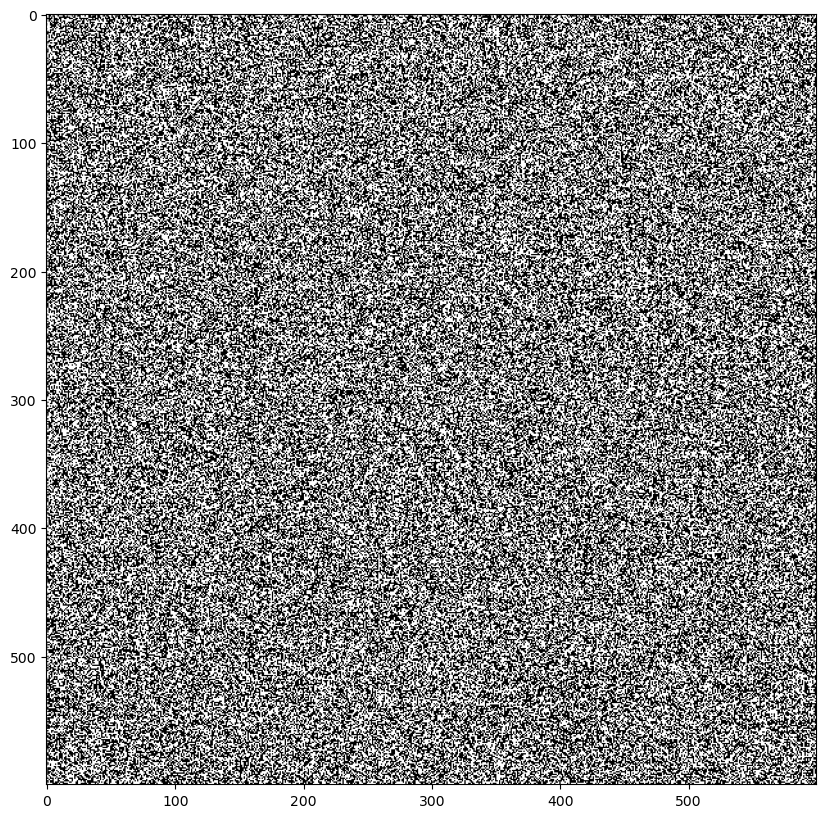

In [46]:
display_img (white_noise)

In [47]:
noise_img = white_noise + img

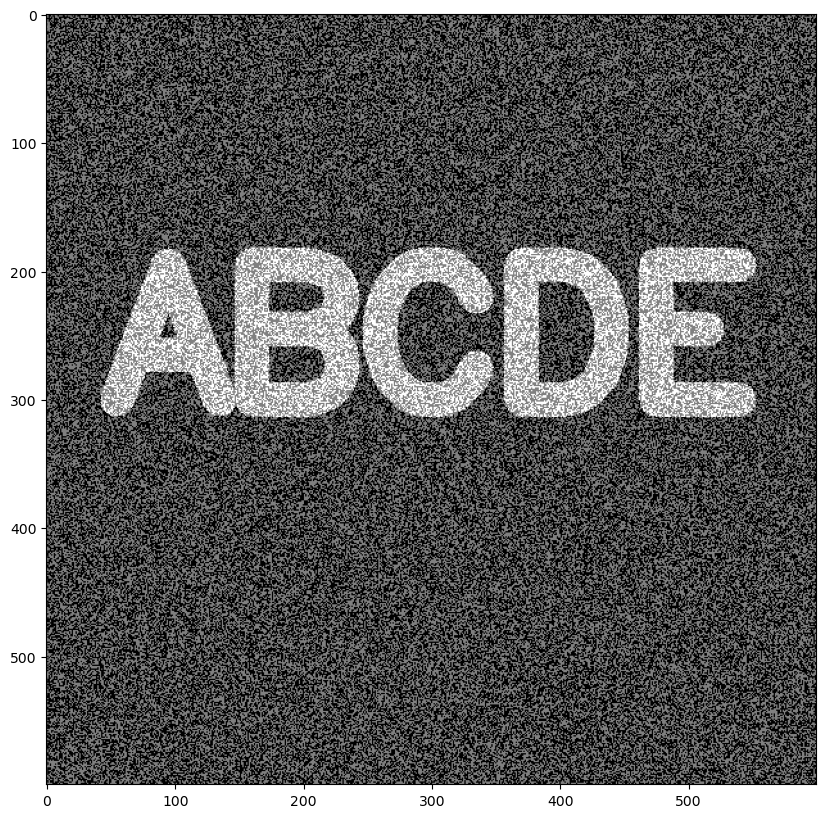

In [48]:
display_img(noise_img)

In [49]:
# using opening ( morphological operator ) to get rid of this noise 
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

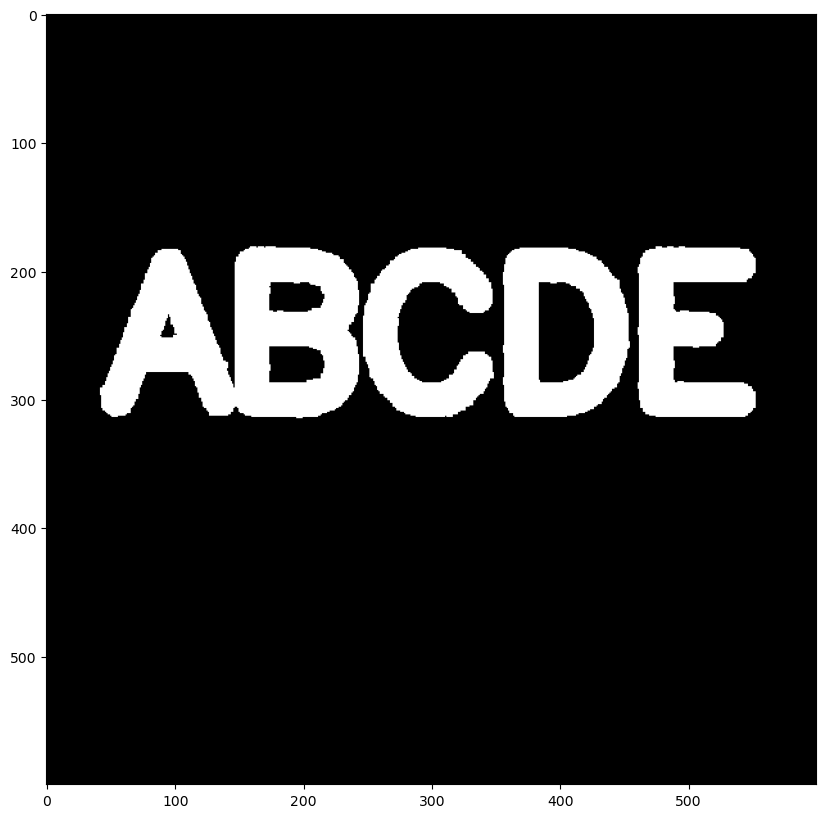

In [51]:
display_img(opening)

In [59]:
# creating a image that has foreground noise
img = load_img()

In [60]:
black_noise = np.random.randint(low=0,high = 2 , size = (600,600))


In [61]:
# this will not effect black, it will effect foreground white
black_noise = black_noise * -255

In [62]:
black_noise

array([[   0,    0,    0, ..., -255, -255, -255],
       [-255,    0, -255, ..., -255, -255,    0],
       [   0,    0, -255, ..., -255, -255, -255],
       ...,
       [-255,    0, -255, ...,    0,    0,    0],
       [   0, -255,    0, ...,    0,    0, -255],
       [-255, -255, -255, ...,    0,    0, -255]])

In [63]:
black_noise_img = img + black_noise

In [64]:
black_noise_img

array([[   0.,    0.,    0., ..., -255., -255., -255.],
       [-255.,    0., -255., ..., -255., -255.,    0.],
       [   0.,    0., -255., ..., -255., -255., -255.],
       ...,
       [-255.,    0., -255., ...,    0.,    0.,    0.],
       [   0., -255.,    0., ...,    0.,    0., -255.],
       [-255., -255., -255., ...,    0.,    0., -255.]])

In [65]:
black_noise_img[black_noise_img == -255] = 0

In [66]:
black_noise_img.min()

0.0

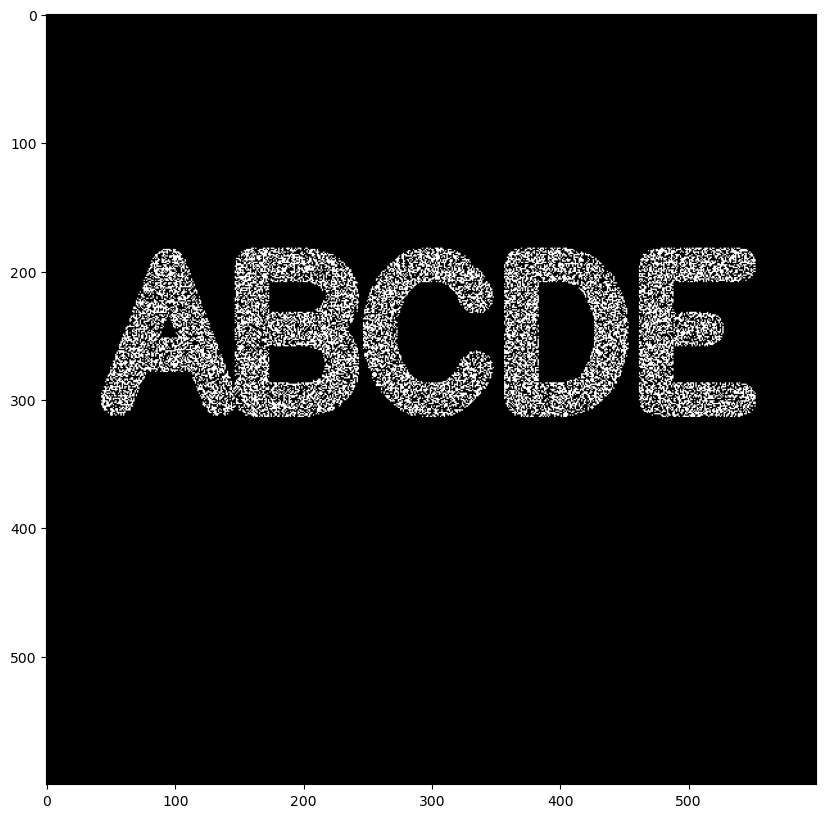

In [67]:
display_img(black_noise_img)

In [69]:
# closing 
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

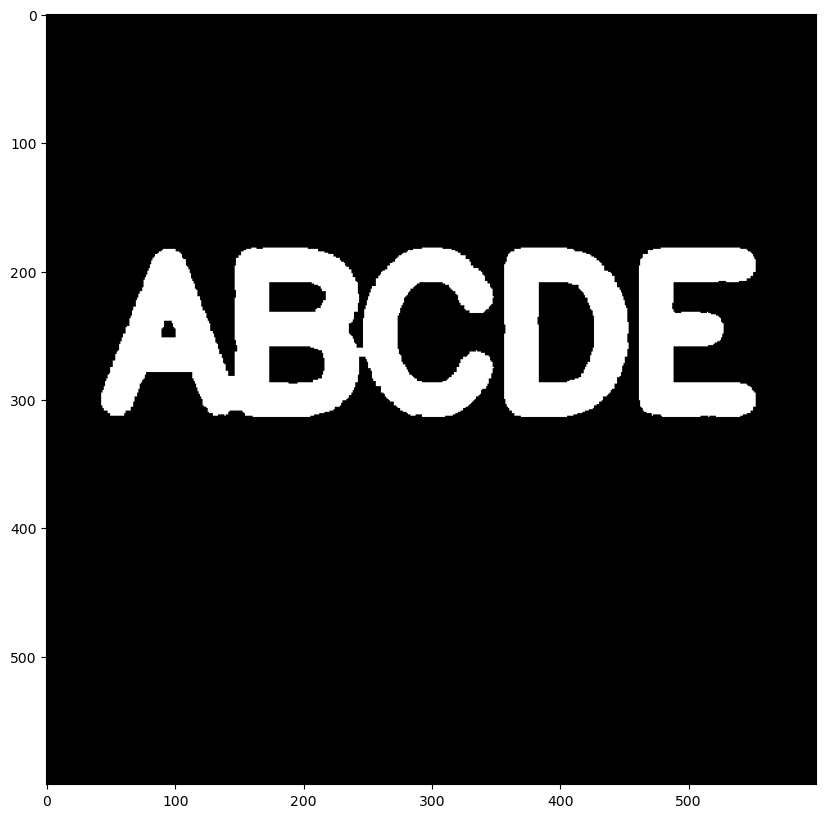

In [70]:
display_img(closing)

In [71]:
# morphological gradient 
img = load_img()

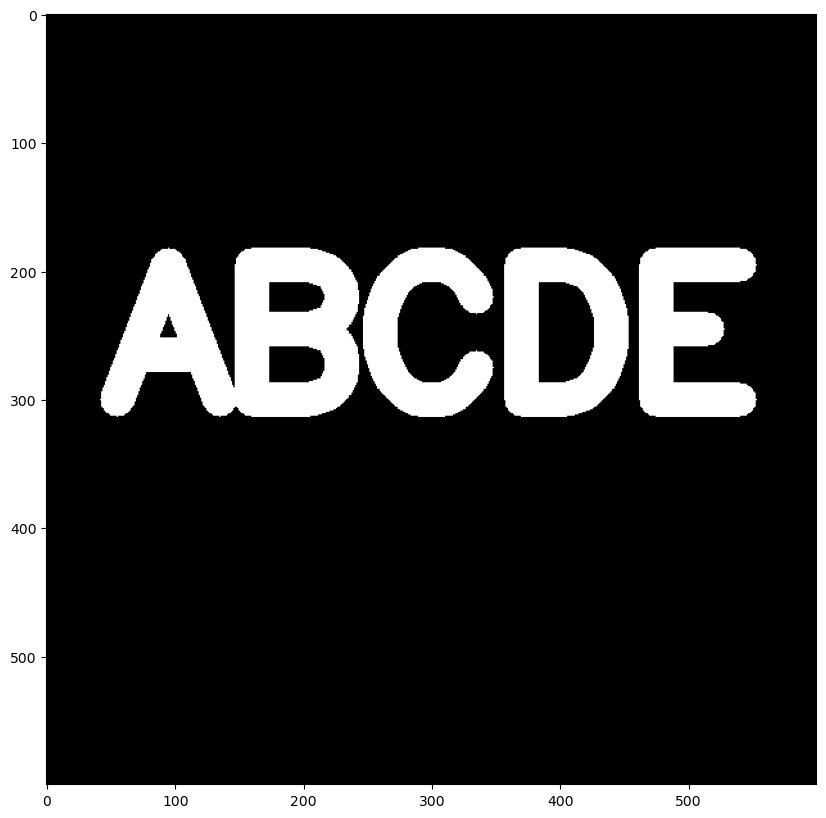

In [72]:
display_img(img)

In [73]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

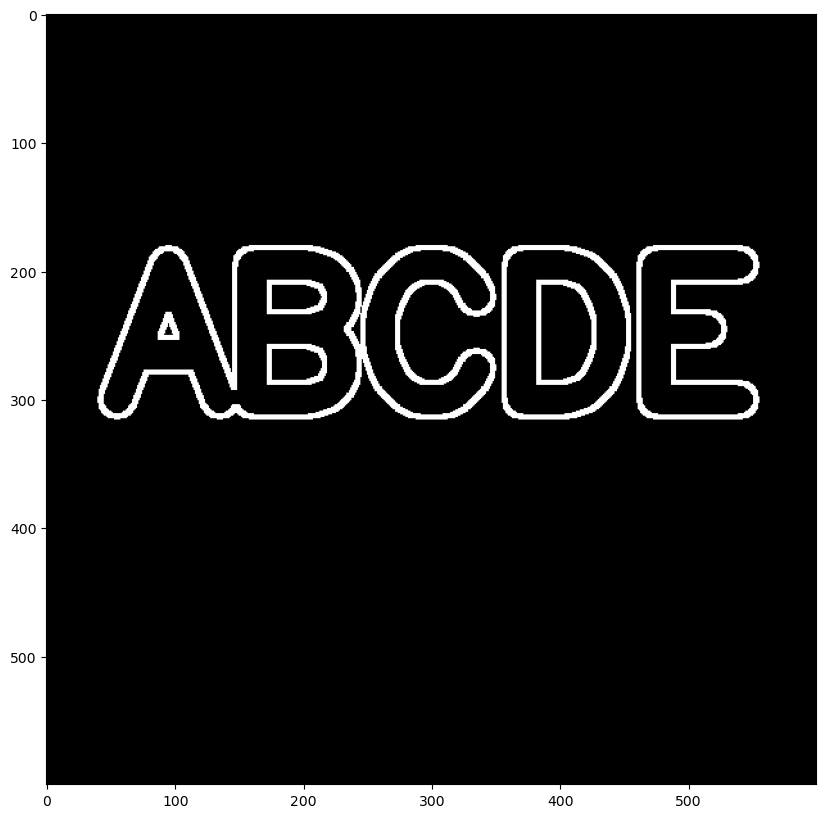

In [74]:
display_img(gradient)